# Observed Values

Length of observed array: 56
Maximum element in array is:  3147.0
Index of maximum array is: (array([27]),)


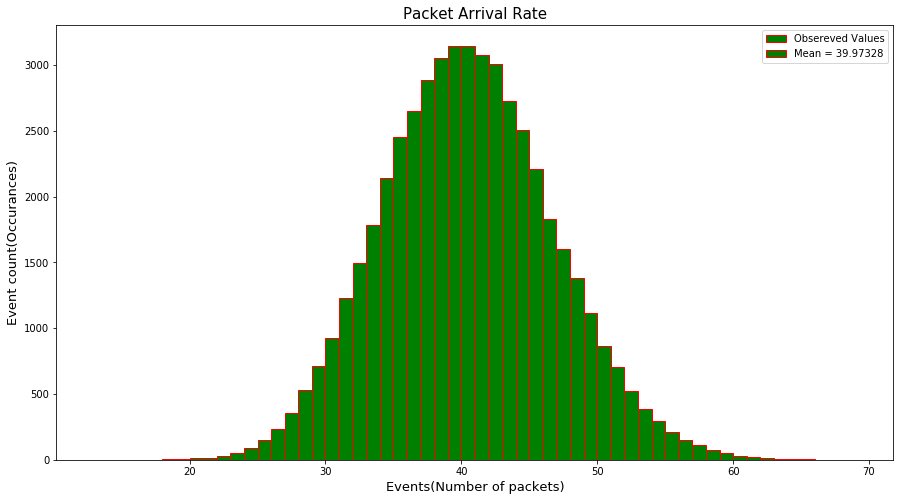

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
import math
import decimal
import numpy
#import plotly.express as px
from numpy import asarray
from numpy import savetxt

# Data is read from the CSV file and saved to a container 
cols = ['iAT', 'PacketSize']
data = pd.read_csv('udp_rcvd_vector.csv',
    delimiter=',', skiprows=[0], names=cols)
X = data['iAT']
df = pd.DataFrame(data)

# Time is divided into interval and corresponding data points are also arranged accordingly   
max_time = float(math.ceil(df['iAT'].max()))
min_time = float(math.floor(df['iAT'].min()))

df_summary = df["iAT"].groupby(pd.cut(df["iAT"], 
            np.arange(min_time, max_time+0.4, 0.4),labels=np.arange(int(min_time),int(max_time), 
            decimal.Decimal('0.4')))).count().to_frame('Occurrences').reset_index()

df2_summary = df_summary.astype(float)

#df2_summary['Throughput'] = df2_summary['rxPkOk_Sum']/df2_summary['Sim_T']

# Genenerated vectors from the previous setp are written to a seperate CSV file 
with open('iAT_data.csv', 'w') as csv_file:
    df2_summary.to_csv(path_or_buf=csv_file)
    
# Newly generated data is read in the following block of code for further processing and plotting 
columns = ['Serial_Num', 'iAT', 'Occurance_count']
df = pd.read_csv('iAT_data.csv',delimiter=',', skiprows=[0], names=columns)

x = df['iAT']
y = df['Occurance_count']

plt.figure(figsize=(15,8))
plt.title('Packet Arrival Rate', size = 15)
plt.xlabel('Events(Number of packets)', size = 13)
plt.ylabel('Event count(Occurances)', size = 13)
(n, bins, patches) = plt.hist(y, bins = range(int(y.min()), int(y.max())+1, 1) , color = 'green', ec = 'red', label = True)
plt.legend(['Obsereved Values','Mean = 39.97328'], loc='upper right')


#print(bins)
print(f"Length of observed array: {len(n)}")
#print(patches)
# The following line supresses the scientific notation of data recodrding 
np.set_printoptions(suppress=True)
data = asarray(n)

# Packet count vector is saved to a new csv file
savetxt('data.csv', data, delimiter=',')
print("Maximum element in array is: ", numpy.amax(n))
print(f"Index of maximum array is: {numpy.where(n == numpy.amax(n))}")

# Expected Values

The mean of distribution is: 39.97328
Length of expected array: 56


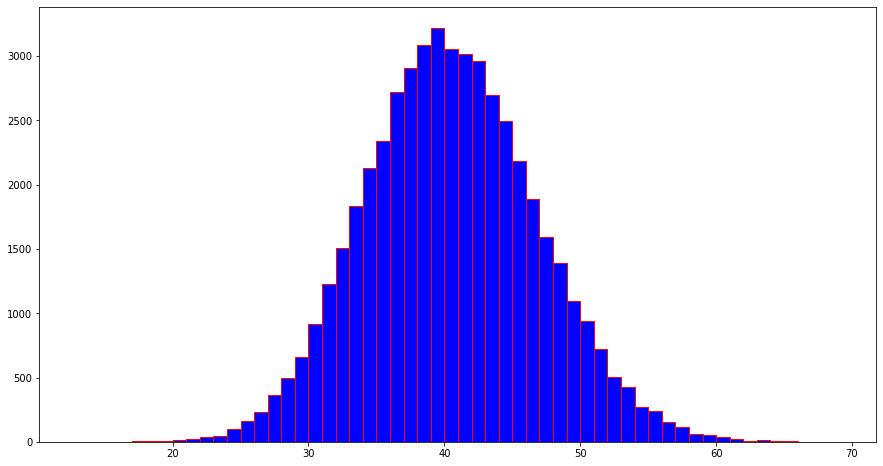

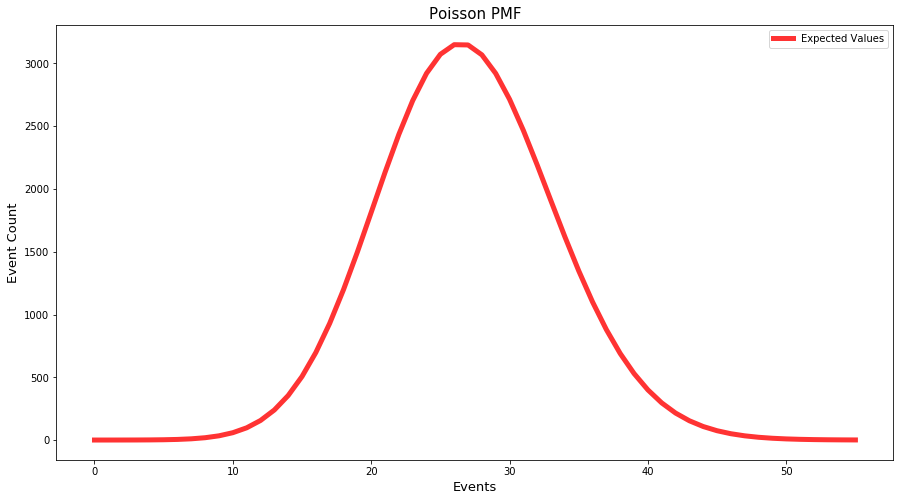

In [17]:
import scipy.stats 
import numpy
import numpy as np
import pandas as pd
from scipy.stats import poisson

# We are required to generate an expected array with the same mean as the observed array
n_pts = 50000
columns = ['Serial_Num', 'iAT', 'Occurance_count']
df = pd.read_csv('iAT_data.csv',delimiter=',', skiprows=[0], names=columns)
x =  df['Occurance_count']

# Following line of code generates the poisson distributed data using mean value for the observed data
poisson_mean = df['Occurance_count'].mean() 
print(f"The mean of distribution is: {poisson_mean}")

#data_poisson = poisson.rvs(mu = poisson_mean, size = n_pts)
data_poisson= np.random.poisson(poisson_mean, n_pts)

plt.figure(figsize=(15,8))
(m, bins, patches) = plt.hist(data_poisson, bins = range(int(x.min()), int(x.max())+1, 1) , color = "blue", ec = "red")



# Here we calculate the pdf for each bin and multiply it by the total count to get expected array of poisson distributed data
expected_count = []
for i in range(int(x.min()), int(x.max()), 1):
    expected_count.append(n_pts *  poisson.pmf(i,poisson_mean ))   
expected_count = np.array(expected_count)

print(f"Length of expected array: {len(expected_count)}")

plt.figure(figsize=(15,8))
plt.title("Poisson PMF", size = 15)
plt.xlabel("Events", size = 13)
plt.ylabel("Event Count", size = 13)
plt.plot(expected_count,'r-', lw = 5, alpha = 0.8, color = "red",  label = True)
plt.legend(['Expected Values', 'Mean = 39.97328'])
plt.show()

# Expected array of data is saved to csv file
savetxt('expected_count.csv', expected_count, delimiter=',')


# Chi-Square Test

In [18]:
from scipy.stats import chisquare

cols = ['obs']
obs = pd.read_csv('data.csv',delimiter=',', names = cols)
observed_vals = obs['obs']

cols1 = ['exp']
exp = pd.read_csv('expected_count.csv',delimiter=',', names=cols1)
expected_vals = exp['exp']
#print(observed_vals)
#print(expected_vals)
chi_square = chisquare(observed_vals, f_exp = expected_vals, ddof = 0, axis = 0)
print(chi_square)

Power_divergenceResult(statistic=68.18351153487062, pvalue=0.1091494523737295)


In [19]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi_square = sum([(obs - exp)**2/exp for obs, exp in zip(observed_vals, expected_vals)]) 
print(f"Chi-square Statistics: {chi_square}")

p_value = 1 - chi2.cdf(x = chi_square, df = 55)
print(f"Chi-square P-Value: {p_value}")


Chi-square Statistics: 68.18351153487062
Chi-square P-Value: 0.10914945237372953
